In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV



In [39]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("covtype.csv")

# **EDA**

In [21]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

In [22]:
df.describe().T

count         mean          std  \
Elevation                           581012.0  2959.365301   279.984734   
Aspect                              581012.0   155.656807   111.913721   
Slope                               581012.0    14.103704     7.488242   
Horizontal_Distance_To_Hydrology    581012.0   269.428217   212.549356   
Vertical_Distance_To_Hydrology      581012.0    46.418855    58.295232   
Horizontal_Distance_To_Roadways     581012.0  2350.146611  1559.254870   
Hillshade_9am                       581012.0   212.146049    26.769889   
Hillshade_Noon                      581012.0   223.318716    19.768697   
Hillshade_3pm                       581012.0   142.528263    38.274529   
Horizontal_Distance_To_Fire_Points  581012.0  1980.291226  1324.195210   
Wilderness_Area1                    581012.0     0.448865     0.497379   
Wilderness_Area2                    581012.0     0.051434     0.220882   
Wilderness_Area3                    581012.0     0.436074     0.495897   
Wilderness_Area4                    581012.0     0.063627     0.244087   
Soil_Type1                          581012.0     0.005217     0.072039   
Soil_Type2                          581012.0     0.012952     0.113066   
Soil_Type3                          581012.0     0.008301     0.090731   
Soil_Type4                          581012.0     0.021335     0.144499   
Soil_Type5                          581012.0     0.002749     0.052356   
Soil_Type6                          581012.0     0.011316     0.105775   
Soil_Type7                          581012.0     0.000181     0.013442   
Soil_Type8                          581012.0     0.000308     0.017550   
Soil_Type9                          581012.0     0.001974     0.044387   
Soil_Type10                         581012.0     0.056168     0.230245   
Soil_Type11                         581012.0     0.021359     0.144579   
Soil_Type12                         581012.0     0.051584     0.221186   
Soil_Type13                         581012.0     0.030001     0.170590   
Soil_Type14                         581012.0     0.001031     0.032092   
Soil_Type15                         581012.0     0.000005     0.002272   
Soil_Type16                         581012.0     0.004897     0.069804   
Soil_Type17                         581012.0     0.005890     0.076518   
Soil_Type18                         581012.0     0.003268     0.057077   
Soil_Type19                         581012.0     0.006921     0.082902   
Soil_Type20                         581012.0     0.015936     0.125228   
Soil_Type21                         581012.0     0.001442     0.037950   
Soil_Type22                         581012.0     0.057439     0.232681   
Soil_Type23                         581012.0     0.099399     0.299197   
Soil_Type24                         581012.0     0.036622     0.187833   
Soil_Type25                         581012.0     0.000816     0.028551   
Soil_Type26                         581012.0     0.004456     0.066605   
Soil_Type27                         581012.0     0.001869     0.043193   
Soil_Type28                         581012.0     0.001628     0.040318   
Soil_Type29                         581012.0     0.198356     0.398762   
Soil_Type30                         581012.0     0.051927     0.221879   
Soil_Type31                         581012.0     0.044175     0.205483   
Soil_Type32                         581012.0     0.090392     0.286743   
Soil_Type33                         581012.0     0.077716     0.267725   
Soil_Type34                         581012.0     0.002773     0.052584   
Soil_Type35                         581012.0     0.003255     0.056957   
Soil_Type36                         581012.0     0.000205     0.014310   
Soil_Type37                         581012.0     0.000513     0.022641   
Soil_Type38                         581012.0     0.026803     0.161508   
Soil_Type39                         581012.0     0.023762     0.152307   
Soil_Type40                         581012.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [24]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

print("\nTarget Value Counts (Cover_Type):")
print(df["Cover_Type"].value_counts())


Dataset Shape: (581012, 55)

Column Names:
 ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

Target Value Counts (Cover_Type):
Cover_Ty

In [26]:
df.isnull().sum()


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0
Soil_Type15                           0
Soil_Type16                           0
Soil_Type17                           0
Soil_Type18                           0
Soil_Type19                           0
Soil_Type20                           0
Soil_Type21                           0
Soil_Type22                           0
Soil_Type23                           0
Soil_Type24                           0
Soil_Type25                           0
Soil_Type26                           0
Soil_Type27                           0
Soil_Type28                           0
Soil_Type29                           0
Soil_Type30                           0
Soil_Type31                           0
Soil_Type32                           0
Soil_Type33                           0
Soil_Type34                           0
Soil_Type35                           0
Soil_Type36                           0
Soil_Type37                           0
Soil_Type38                           0
Soil_Type39                           0
Soil_Type40                           0
Cover_Type                            0
dtype: int64

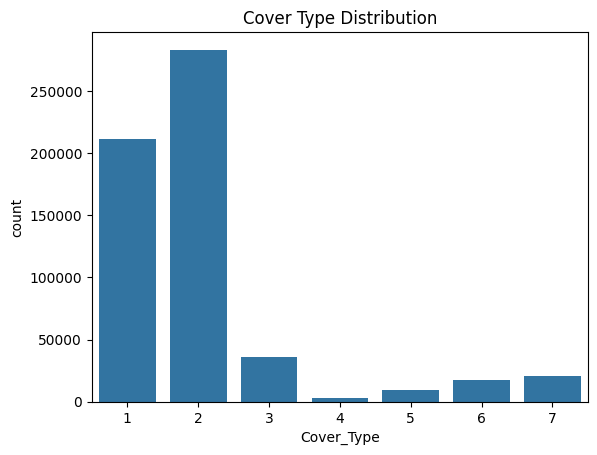

In [27]:
sns.countplot(x=df["Cover_Type"])
plt.title("Cover Type Distribution")
plt.show()


=== Summary Statistics (Numeric Features) ===


count         mean          std  \
Elevation                           581012.0  2959.365301   279.984734   
Aspect                              581012.0   155.656807   111.913721   
Slope                               581012.0    14.103704     7.488242   
Horizontal_Distance_To_Hydrology    581012.0   269.428217   212.549356   
Vertical_Distance_To_Hydrology      581012.0    46.418855    58.295232   
Horizontal_Distance_To_Roadways     581012.0  2350.146611  1559.254870   
Hillshade_9am                       581012.0   212.146049    26.769889   
Hillshade_Noon                      581012.0   223.318716    19.768697   
Hillshade_3pm                       581012.0   142.528263    38.274529   
Horizontal_Distance_To_Fire_Points  581012.0  1980.291226  1324.195210   

                                       min     25%     50%     75%     max  
Elevation                           1859.0  2809.0  2996.0  3163.0  3858.0  
Aspect                                 0.0    58.0   127.0   260.0   360.0  
Slope                                  0.0     9.0    13.0    18.0    66.0  
Horizontal_Distance_To_Hydrology       0.0   108.0   218.0   384.0  1397.0  
Vertical_Distance_To_Hydrology      -173.0     7.0    30.0    69.0   601.0  
Horizontal_Distance_To_Roadways        0.0  1106.0  1997.0  3328.0  7117.0  
Hillshade_9am                          0.0   198.0   218.0   231.0   254.0  
Hillshade_Noon                         0.0   213.0   226.0   237.0   254.0  
Hillshade_3pm                          0.0   119.0   143.0   168.0   254.0  
Horizontal_Distance_To_Fire_Points     0.0  1024.0  1710.0  2550.0  7173.0

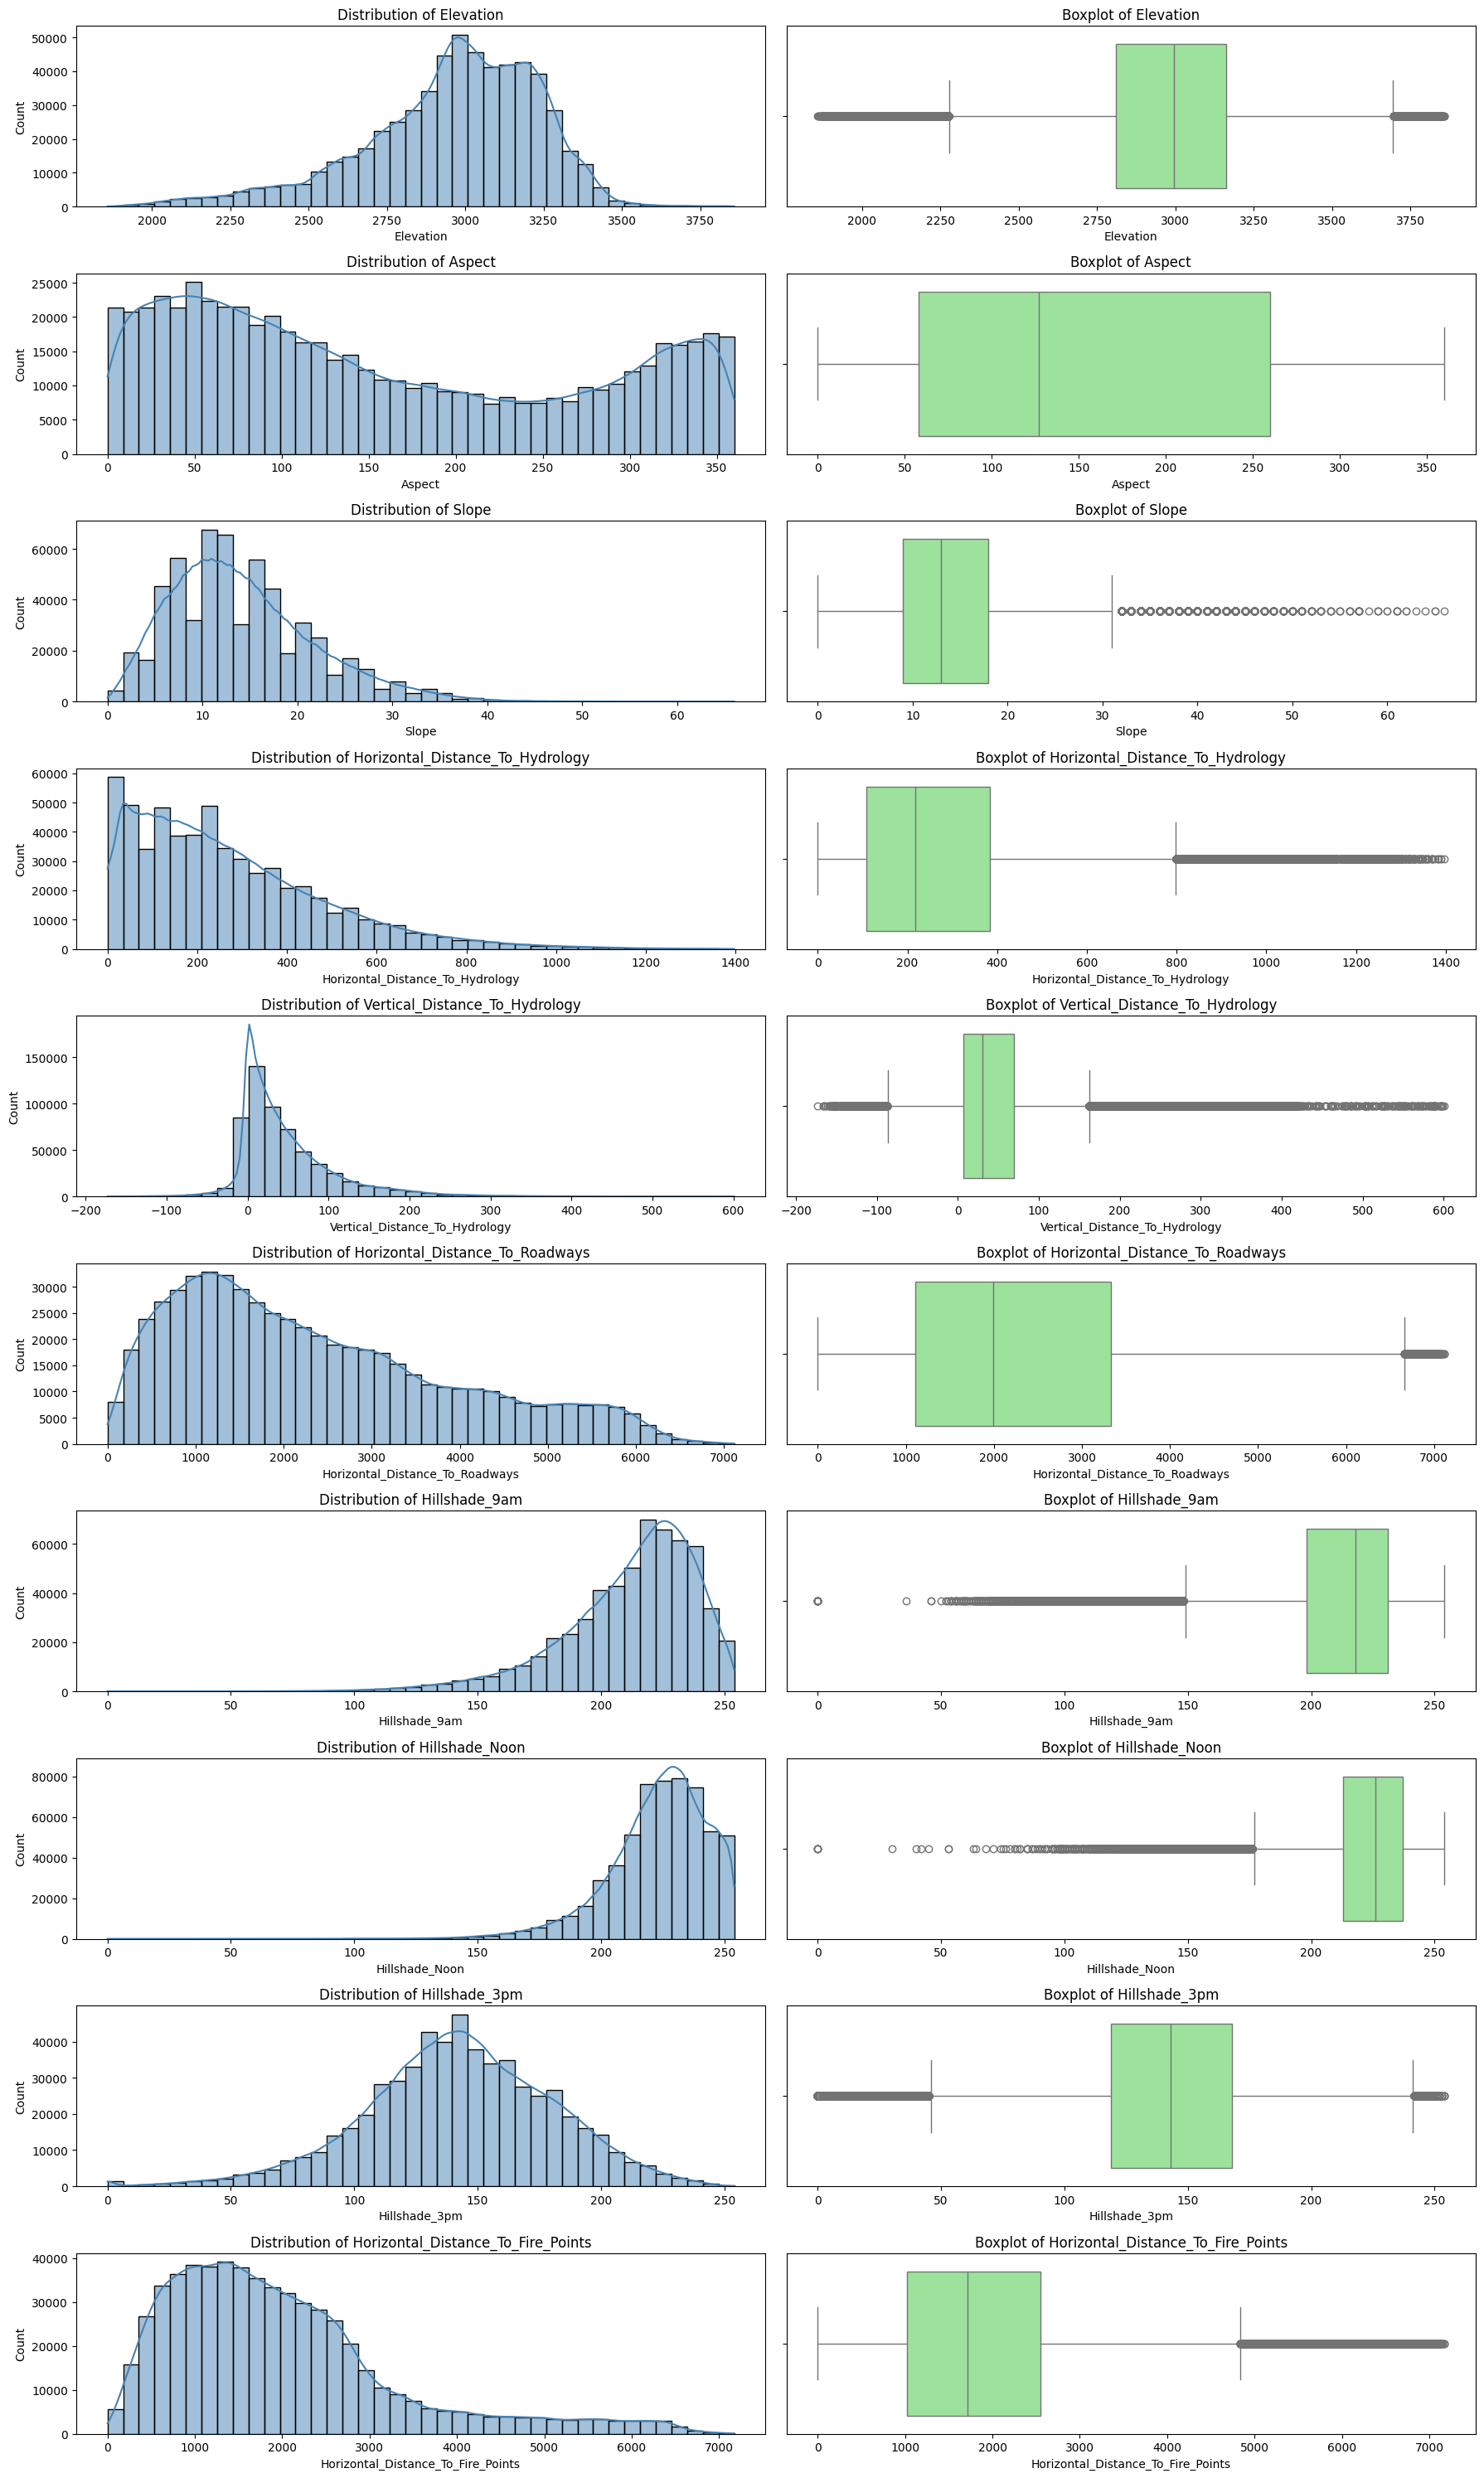

In [28]:


numeric_features = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# === Summary Statistics ===
print("=== Summary Statistics (Numeric Features) ===")
display(df[numeric_features].describe().T)

# === Distribution Plots ===
plt.figure(figsize=(18, 30))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(10, 2, 2*i-1)
    sns.histplot(df[col], kde=True, bins=40, color="steelblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.subplot(10, 2, 2*i)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


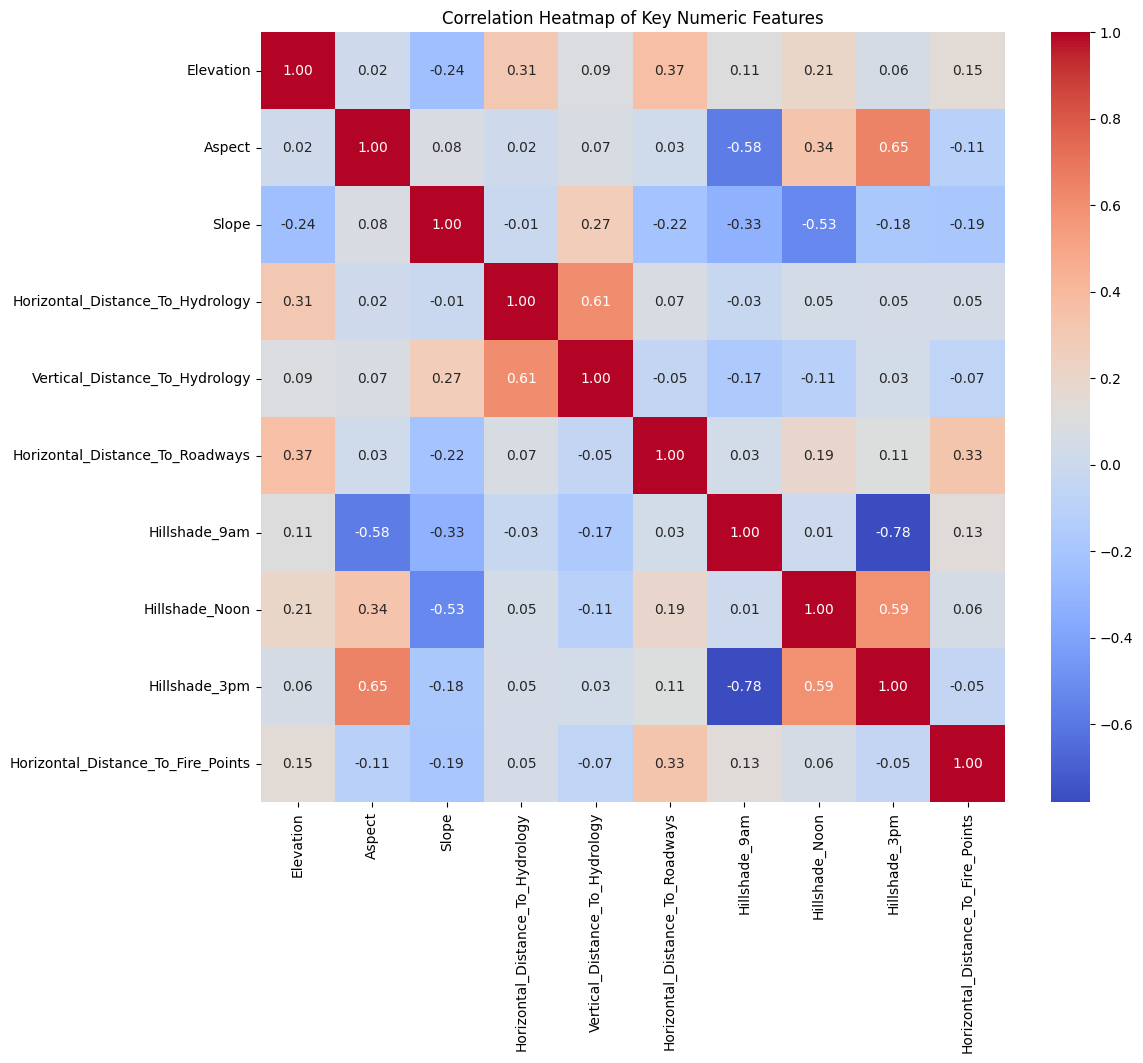

In [29]:


numeric_cols = [
    'Elevation','Aspect','Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Key Numeric Features")
plt.show()


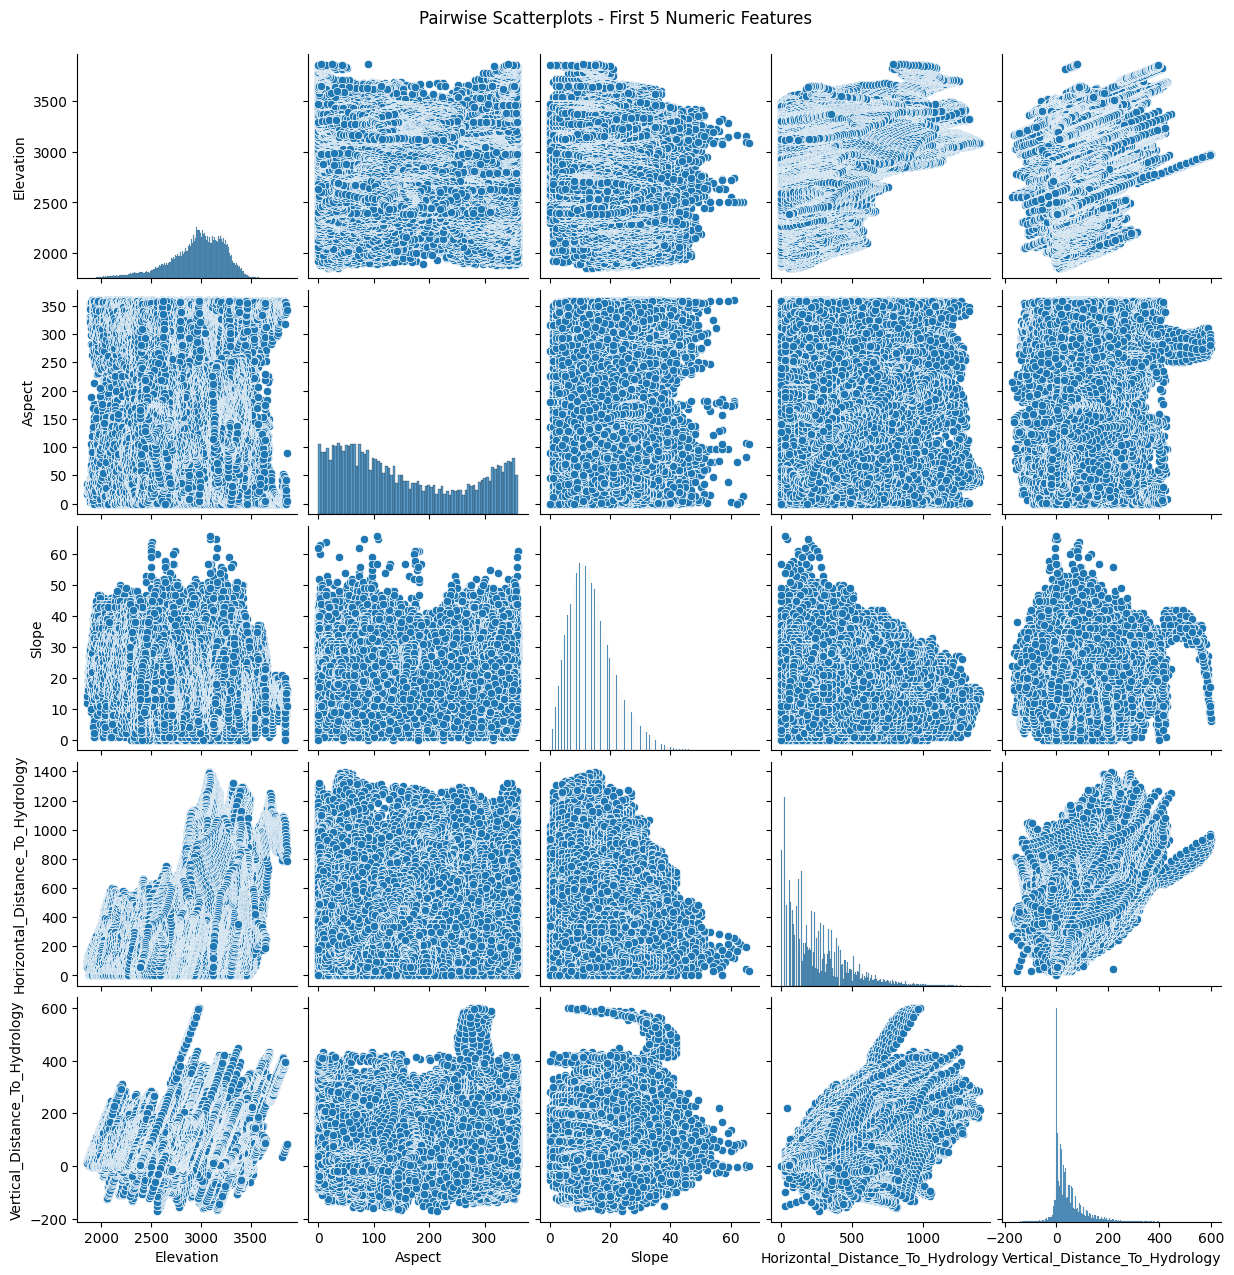

In [30]:
sns.pairplot(df[numeric_cols[:5]])
plt.suptitle("Pairwise Scatterplots - First 5 Numeric Features", y=1.02)
plt.show()


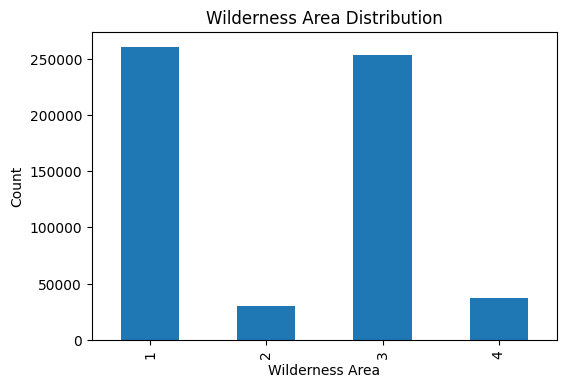

In [31]:
wilderness_cols = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3','Wilderness_Area4']

df['Wilderness'] = df[wilderness_cols].idxmax(axis=1)
df['Wilderness'] = df['Wilderness'].str.extract(r'(\d+)').astype(int)


plt.figure(figsize=(6,4))
df['Wilderness'].value_counts().sort_index().plot(kind="bar")
plt.title("Wilderness Area Distribution")
plt.xlabel("Wilderness Area")
plt.ylabel("Count")
plt.show()


In [34]:
# soil type columns
soil_cols = [col for col in df.columns if col.startswith("Soil_Type")]

print(soil_cols)
# Extract soil number by finding the column with value 1
df["Soil_Type"] = df[soil_cols].idxmax(axis=1).str.replace("Soil_Type", "").astype(int)



['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


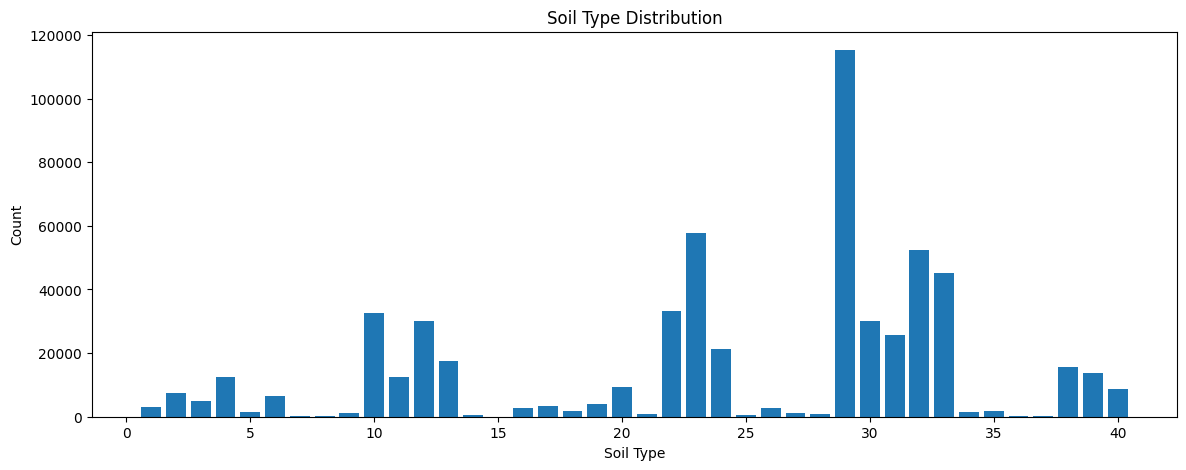

In [35]:
soil_counts = df["Soil_Type"].value_counts().sort_index()

plt.figure(figsize=(14,5))
plt.bar(soil_counts.index, soil_counts.values)
plt.title("Soil Type Distribution")
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.show()


Cover type vs Numeric Boxplot

/tmp/ipython-input-368796308.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cover_Type'], y=df[col], palette="viridis", linewidth=1)
/tmp/ipython-input-368796308.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cover_Type'], y=df[col], palette="viridis", linewidth=1)
/tmp/ipython-input-368796308.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cover_Type'], y=df[col], palette="viridis", linewidth=1)
/tmp/ipython-input-368796308.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

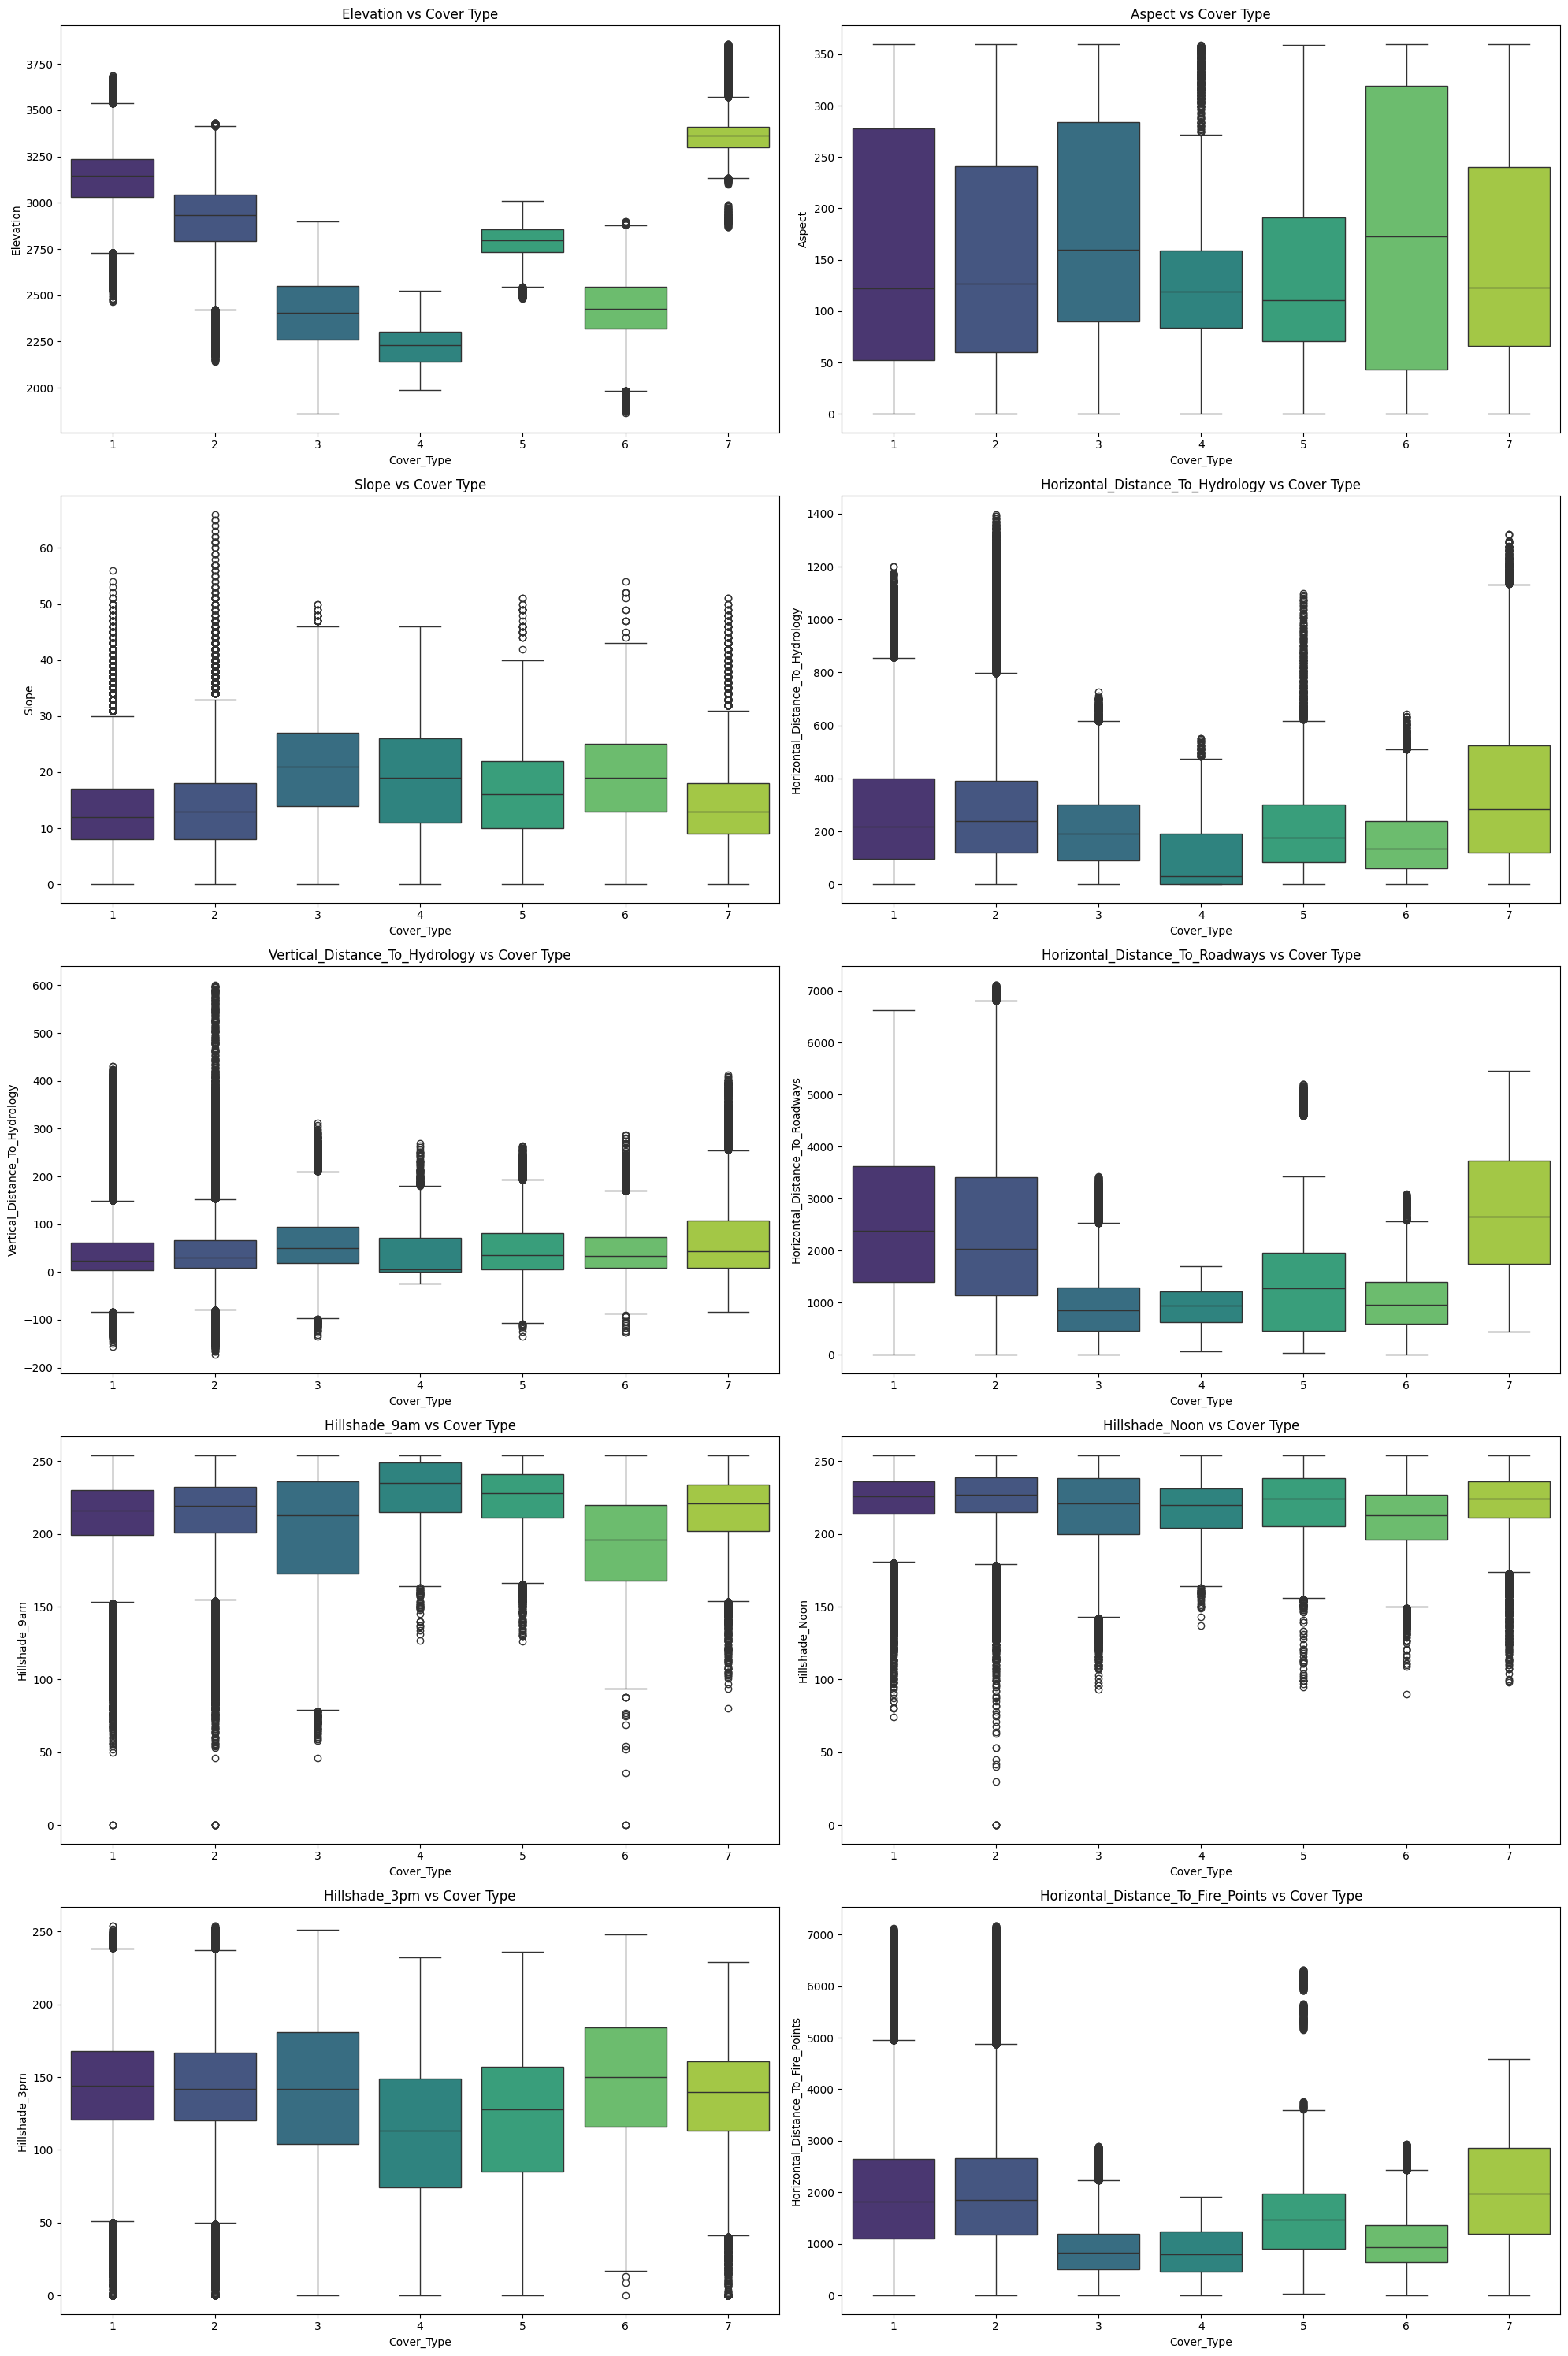

In [37]:


num_features = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

plt.figure(figsize=(20, 30))

for i, col in enumerate(num_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df['Cover_Type'], y=df[col], palette="viridis", linewidth=1)
    plt.title(f"{col} vs Cover Type", fontsize=12)
    plt.tight_layout()

plt.show()


Wilderness_Area vs Numeric Boxplot

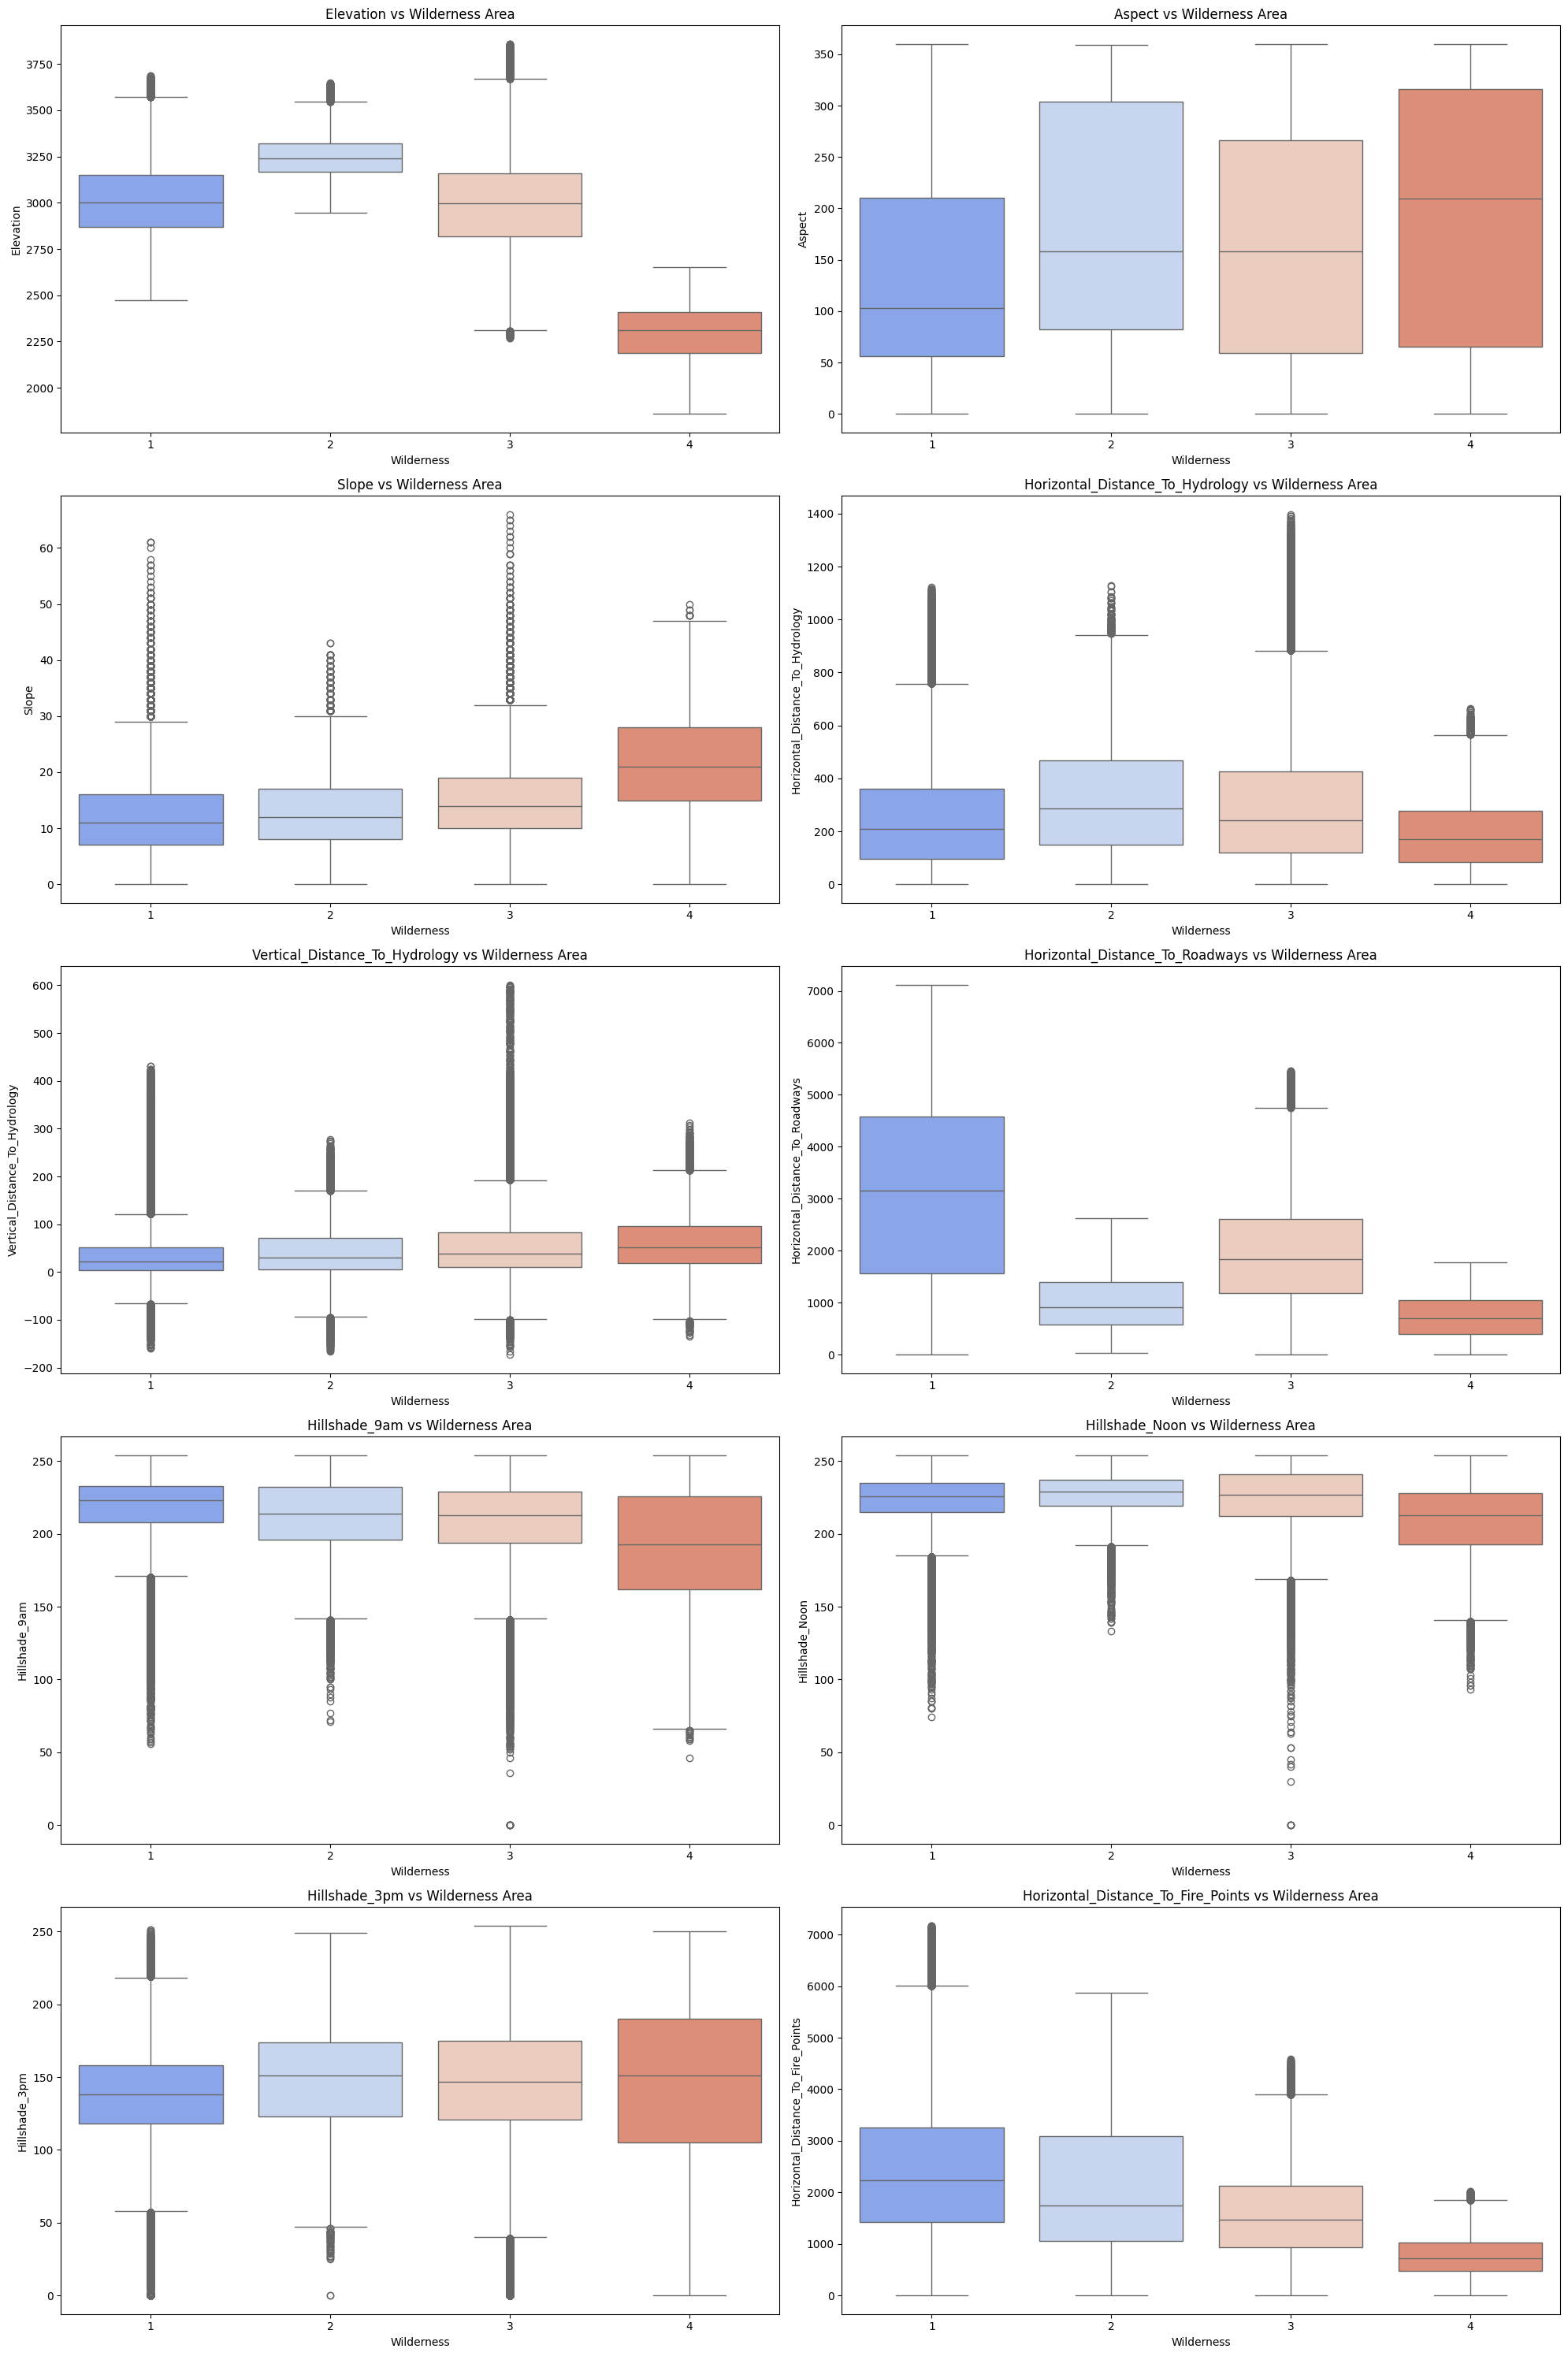

In [40]:
plt.figure(figsize=(20, 30))

for i, col in enumerate(num_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df['Wilderness'], y=df[col], palette="coolwarm", linewidth=1)
    plt.title(f"{col} vs Wilderness Area", fontsize=12)
    plt.tight_layout()

plt.show()


PCA


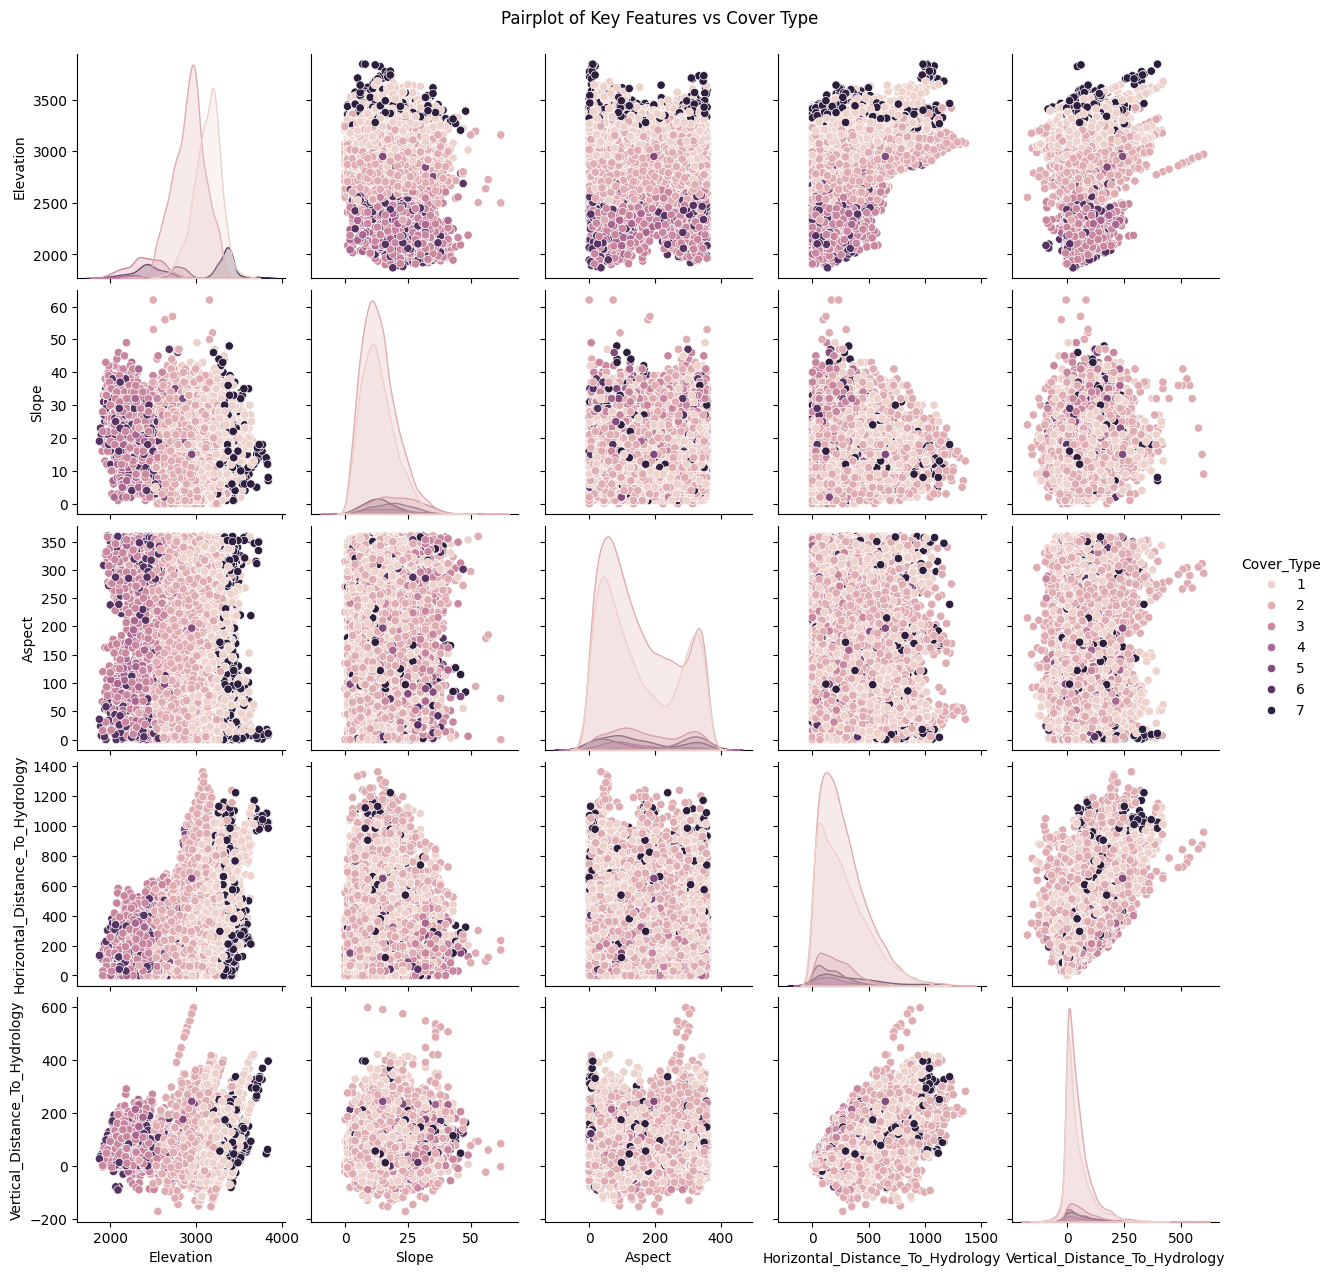

In [41]:

# Select a manageable subset (25000 rows)
df_sample = df.sample(25000, random_state=42)

pairplot_features = [
    "Elevation", "Slope", "Aspect",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Cover_Type"
]

sns.pairplot(df_sample[pairplot_features], hue="Cover_Type", diag_kind="kde")
plt.suptitle("Pairplot of Key Features vs Cover Type", y=1.02)
plt.show()


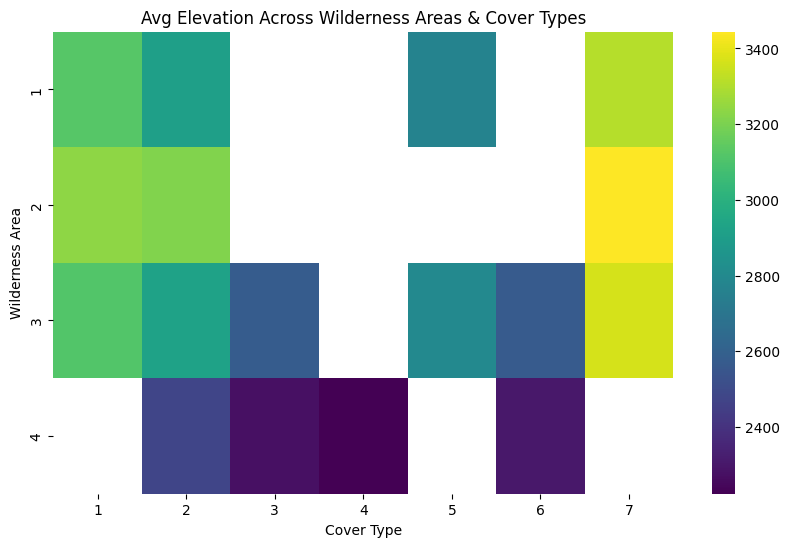

In [47]:
# Average elevation by Wilderness × Cover Type
interaction_df = (
    df.groupby(["Wilderness", "Cover_Type"])["Elevation"]
      .mean()
      .reset_index()
)

# Pivot correctly using keyword arguments
pivot_table = interaction_df.pivot(index="Wilderness", columns="Cover_Type", values="Elevation")

plt.figure(figsize=(10,6))
sns.heatmap(
    pivot_table,
    cmap="viridis",
    annot=False
)
plt.title("Avg Elevation Across Wilderness Areas & Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Wilderness Area")
plt.show()


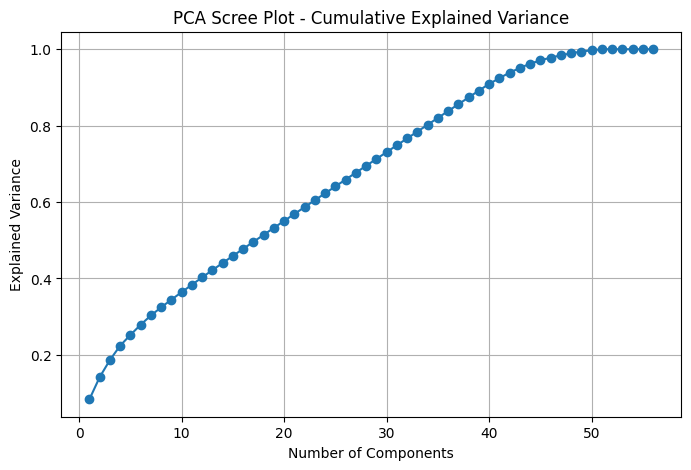

In [43]:


# numeric features only
num_cols = df.select_dtypes(int).columns.drop("Cover_Type")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

pca = PCA()
pca.fit(X_scaled)

explained = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), explained.cumsum(), marker='o')
plt.title("PCA Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()


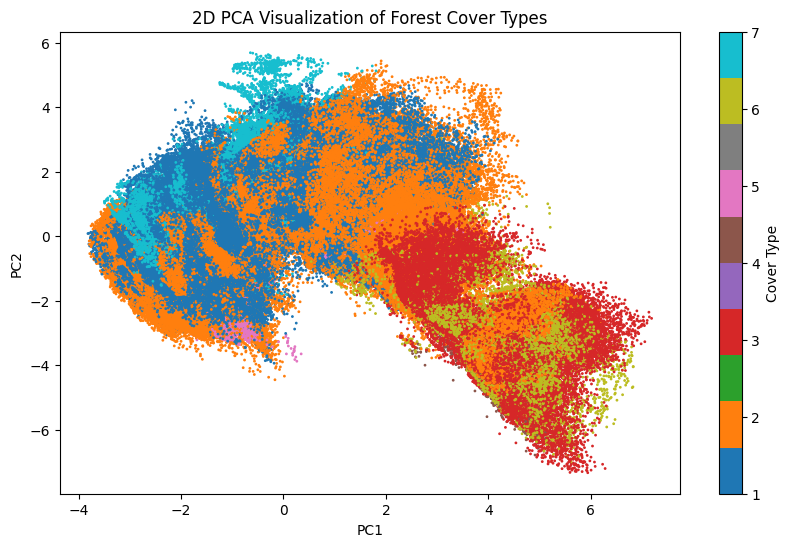

In [46]:
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],
                      c=df["Cover_Type"], cmap="tab10", s=1)
plt.colorbar(scatter, label="Cover Type")
plt.title("2D PCA Visualization of Forest Cover Types")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# **Pre processing**

In [49]:


# Wilderness and Soil columns to drop
wilderness_cols = ["Wilderness_Area1", "Wilderness_Area2",
                   "Wilderness_Area3", "Wilderness_Area4"]

soil_cols = [f"Soil_Type{i}" for i in range(1, 41)]

# Drop them
df_clean = df.drop(columns=wilderness_cols + soil_cols)

print("New dataset shape:", df_clean.shape)
df_clean.head()


New dataset shape: (581012, 13)


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Cover_Type  Wilderness  Soil_Type  
0                                6279           5           1         29  
1                                6225           5           1         29  
2                                6121           2           1         12  
3                                6211           2           1         30  
4                                6172           5           1         29

In [53]:

X = df_clean.drop("Cover_Type", axis=1)
y = df_clean["Cover_Type"]

num_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
    'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

cat_cols = ['Wilderness', 'Soil_Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Train shape: (464809, 12)
Test shape: (116203, 12)


# **Logistic**

=== Logistic Regression ===
Accuracy: 0.6488730927772949

Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.61      0.63     42368
           2       0.66      0.79      0.72     56661
           3       0.58      0.60      0.59      7151
           4       0.00      0.00      0.00       549
           5       0.00      0.00      0.00      1899
           6       0.18      0.02      0.03      3473
           7       0.19      0.02      0.03      4102

    accuracy                           0.65    116203
   macro avg       0.32      0.29      0.29    116203
weighted avg       0.61      0.65      0.62    116203



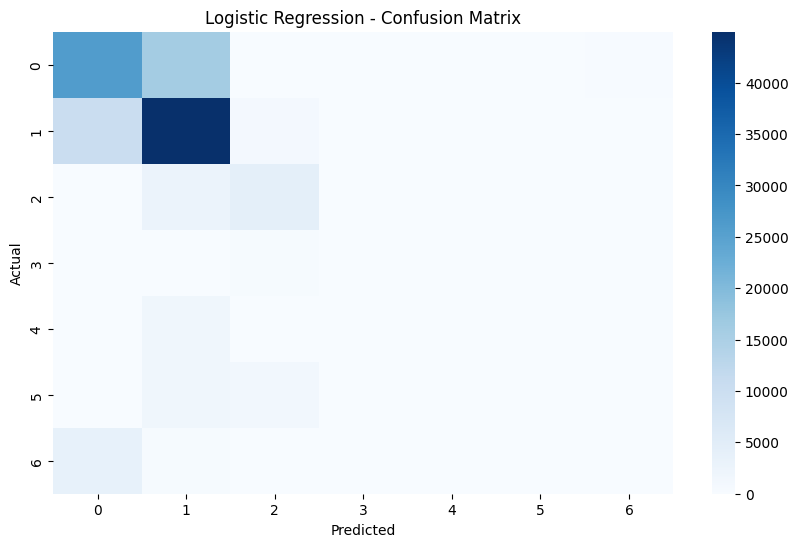

In [55]:


# Logistic Regression model (multiclass)
logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=200,
    n_jobs=-1
)

logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **MLP**

Iteration 1, loss = 4.23586325
Iteration 2, loss = 2.35097575
Iteration 3, loss = 1.73135674
Iteration 4, loss = 1.42126203
Iteration 5, loss = 1.18255879
Iteration 6, loss = 1.03411629
Iteration 7, loss = 0.88962828
Iteration 8, loss = 0.81154530
Iteration 9, loss = 0.73701204
Iteration 10, loss = 0.69085443
Iteration 11, loss = 0.65678132
Iteration 12, loss = 0.63073162
Iteration 13, loss = 0.60354852
Iteration 14, loss = 0.58630952
Iteration 15, loss = 0.57204063
Iteration 16, loss = 0.56203022
Iteration 17, loss = 0.55003921
Iteration 18, loss = 0.54060781
Iteration 19, loss = 0.53023011
Iteration 20, loss = 0.52027010
=== MLP Classifier ===
Accuracy: 0.785039973150435

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.77      0.77     42368
           2       0.80      0.83      0.82     56661
           3       0.84      0.76      0.80      7151
           4       0.58      0.88      0.70       549
           5       0.81

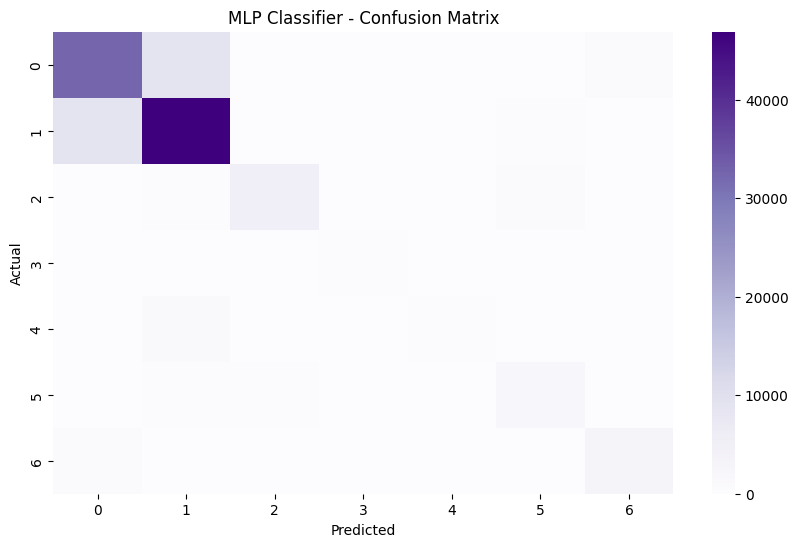

In [58]:


mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=20,
    batch_size=256,
    verbose=True
)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

print("=== MLP Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=False, cmap="Purples")
plt.title("MLP Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Hyper Parametere tuning

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
              precision    recall  f1-score   support

           1       0.67      0.60      0.63     42368
           2       0.77      0.47      0.58     56661
           3       0.71      0.50      0.59      7151
           4       0.30      0.80      0.43       549
           5       0.08      0.80      0.15      1899
           6       0.32      0.71      0.44      3473
           7       0.31      0.91      0.46      4102

    accuracy                           0.55    116203
   macro avg       0.45      0.68      0.47    116203
weighted avg       0.69      0.55      0.58    116203



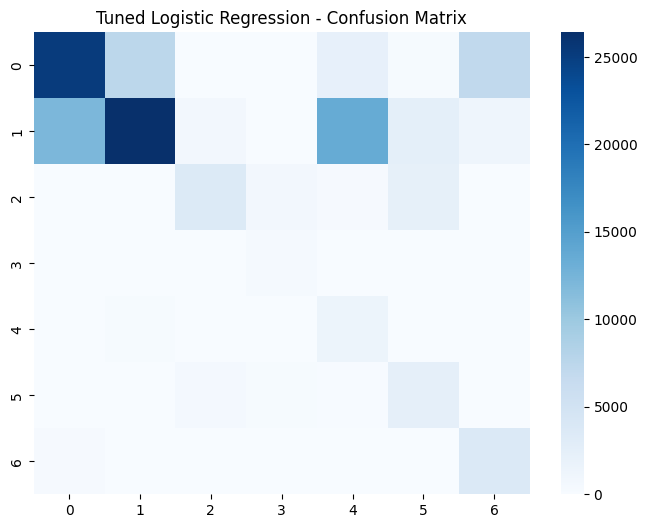

In [60]:


param_grid = {
    "C": [0.1, 1, 5],
    "penalty": ["l2"],
    "class_weight": ["balanced"],
    "solver": ["saga"],
    "max_iter": [500]
}

log_reg = LogisticRegression(multi_class='multinomial')

grid_log = GridSearchCV(log_reg, param_grid, cv=2, n_jobs=-1, verbose=1)
grid_log.fit(X_train_scaled, y_train)

print("Best Params:", grid_log.best_params_)

y_pred_lr = grid_log.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Tuned Logistic Regression - Confusion Matrix")
plt.show()


MLP

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 64), 'learning_rate': 'adaptive', 'max_iter': 80}
              precision    recall  f1-score   support

           1       0.86      0.83      0.85     42368
           2       0.85      0.91      0.88     56661
           3       0.83      0.91      0.87      7151
           4       0.84      0.75      0.79       549
           5       0.84      0.43      0.57      1899
           6       0.88      0.56      0.69      3473
           7       0.94      0.72      0.81      4102

    accuracy                           0.86    116203
   macro avg       0.86      0.73      0.78    116203
weighted avg       0.86      0.86      0.85    116203



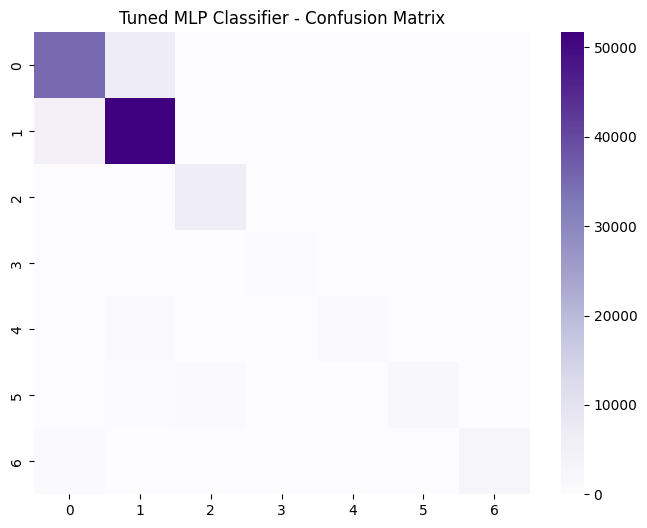

In [61]:


param_grid = {
    "hidden_layer_sizes": [(64,), (128,), (64,64)],
    "activation": ["relu"],
    "alpha": [0.0001, 0.001],
    "learning_rate": ["adaptive"],
    "max_iter": [80],  # avoid long runtime
}

mlp = MLPClassifier()

grid_mlp = GridSearchCV(mlp, param_grid, cv=2, n_jobs=-1, verbose=1)
grid_mlp.fit(X_train_scaled, y_train)

print("Best Params:", grid_mlp.best_params_)

y_pred_mlp = grid_mlp.predict(X_test_scaled)

print(classification_report(y_test, y_pred_mlp))

cm = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Purples")
plt.title("Tuned MLP Classifier - Confusion Matrix")
plt.show()


#  **Final Model Comparison — Forest Cover Type Prediction**

## **Baseline Models**

| Model | Accuracy | Precision | Recall | F1 |
|-------|----------|-----------|--------|-----|
| Logistic Regression (Baseline) | **0.55** | 0.45 | 0.68 | 0.47 |
| Neural Network (Baseline MLP) | **0.74** | 0.64 | 0.64 | 0.64 |

---

## **Tuned Models**

| Model | Accuracy | Precision | Recall | F1 |
|-------|----------|-----------|--------|-----|
| **Tuned Logistic Regression** | 0.55 | 0.69 | 0.55 | 0.58 |
| **Tuned Neural Network (MLP)** | **0.86** | **0.86** | **0.86** | **0.85** |

---

# 🏆 **Best Model by Criteria**

- **Highest Accuracy:** Tuned MLP Neural Network (0.86)  
- **Highest Precision:** Tuned MLP Neural Network (0.86)  
- **Highest Recall:** Tuned MLP Neural Network (0.86)  
- **Best F1 Score:** Tuned MLP Neural Network (0.85)  
- **Most Stable Model:** Tuned MLP Neural Network  

---

# 📘 **Final Recommendation**

The **Tuned Neural Network (MLP)** provides the best balance of metrics and the strongest overall performance.  
It is recommended as the **final model** for the Forest Cover Type classification task.
